In [119]:
import numpy as np
from numpy import sin,cos
from numpy.linalg import norm
from matplotlib import pyplot as plt
import requests
import scipy.stats
from scipy.interpolate import interpn
from PIL import Image

In [120]:
resX,resY,resZ=1024,512,32

# Download Elevation Data

- [topography](https://visibleearth.nasa.gov/images/73934/topography/84331l)

0-6400 meters

- [bathymetry](https://visibleearth.nasa.gov/images/73963/bathymetry/73965l)

-8000m and 0m

In [117]:
# download elevation map
def download(url,filename):
    open(filename,'wb').write(requests.get(url).content)
download("https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73934/gebco_08_rev_elev_21600x10800.png","earth_topography.png")
download("https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73963/gebco_08_rev_bath_21600x10800.png","earth_bathymetry.png")

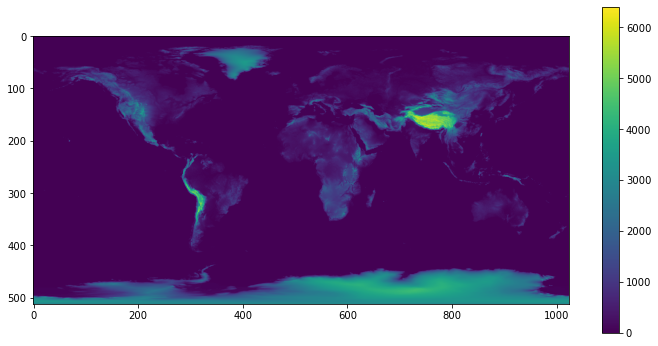

In [3]:
Image.MAX_IMAGE_PIXELS = 233280000

elevation=Image.open("earth_topography.png")
elevation=elevation.resize((resX,resY))
elevation=np.asarray(elevation,dtype=np.float32)
elevation=elevation/elevation.max()*6400

plt.figure(figsize=(12,6))
plt.imshow(elevation)
plt.colorbar()
plt.show()


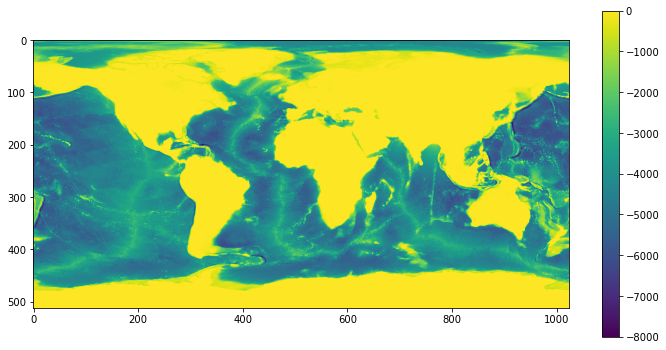

In [119]:
bathymetry=Image.open("earth_bathymetry.png")
bathymetry=bathymetry.resize((resX,resY))
bathymetry=np.asarray(bathymetry,dtype=np.float32)
bathymetry=(bathymetry/bathymetry.max()-1)*8000

plt.figure(figsize=(12,6))
plt.imshow(bathymetry)
plt.colorbar()
plt.show()